imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import train
from hydra import initialize, compose
from omegaconf import OmegaConf
from trainer.online_trainer import OnlineTrainer
from common.buffer import Buffer
from envs import make_env
from common.parser import parse_cfg
from tdmpc2 import TDMPC2
from common.logger import Logger
# world model
from tdmpc2 import WorldModel
import torch
import numpy as np
import matplotlib.pyplot as plt
from dm_control import mujoco

import wandb

/Users/cstein/Library/CloudStorage/GoogleDrive-cstein06@gmail.com/My Drive/work/projects/cerebellum/code/tdmpc2/tdmpc2/train.py:24: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_name='config', config_path='.')


In [3]:
# with initialize(version_base=None, config_path="./"):
#     cfg = compose(config_name='config.yaml')
#     cfg = parse_cfg(cfg)
#     # print(OmegaConf.to_yaml(cfg))

In [4]:
initialize(version_base=None, config_path="./")
cfg = compose(config_name='config.yaml')
cfg = parse_cfg(cfg)

Using custom model size.


In [5]:
trainer_cls = OnlineTrainer
trainer = trainer_cls(		cfg=cfg,
		env=make_env(cfg),
		agent=TDMPC2(cfg),
		buffer=Buffer(cfg),
		logger=Logger(cfg),
	)
# run = trainer.logger._wandb.run

/Users/cstein/miniconda3/envs/tdmpc2/lib/python3.9/site-packages/torch/_functorch/deprecated.py:150: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.combine_state_for_ensemble is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.stack_module_state instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  warn_deprecated("combine_state_for_ensemble", "torch.func.stack_module_state")
ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


------------------------------------
  Task:           Walker Walk
  Steps:          50,000
  Observations:   24
  Actions:        6
  Experiment:     default
------------------------------------


wandb: Currently logged in as: cstein06. Use `wandb login --relogin` to force relogin


Logs will be synced with wandb.
Learnable parameters: 3,558,256
Architecture: WorldModel(
  (_encoder): ModuleDict(
    (state): Sequential(
      (0): NormedLinear(in_features=24, out_features=256, bias=True, act=Mish)
      (1): Linear(in_features=256, out_features=128, bias=True)
    )
  )
  (_ctrl_dynamics): Sequential(
    (0): NormedLinear(in_features=134, out_features=512, bias=True, act=Mish)
    (1): NormedLinear(in_features=512, out_features=512, bias=True, act=Mish)
    (2): Linear(in_features=512, out_features=256, bias=True)
  )
  (_dynamics): Sequential(
    (0): NormedLinear(in_features=134, out_features=512, bias=True, act=Mish)
    (1): NormedLinear(in_features=512, out_features=512, bias=True, act=Mish)
    (2): Linear(in_features=512, out_features=128, bias=True)
  )
  (_reward): Sequential(
    (0): NormedLinear(in_features=134, out_features=512, bias=True, act=Mish)
    (1): NormedLinear(in_features=512, out_features=512, bias=True, act=Mish)
    (2): Linear(in_fea

In [6]:
cfg.checkpoint_wandb

'cstein06/control/walker-walk-default-copper-lake-525-final:v0'

In [7]:
# artifact = trainer.logger._wandb.run.use_artifact('cstein06/control/pointmass-mine-default-dry-pine-448-final:v0', type='model')
artifact = trainer.logger._wandb.run.use_artifact('cstein06/control/walker-walk-default-copper-lake-525-final:v0', type='model')

# artifact = trainer.logger._wandb.run.use_artifact(cfg.checkpoint_wandb, type='model')
artifact_dir = artifact.download()
artifact_path = artifact_dir + f'/{cfg.checkpoint_filename}'
trainer.agent.load(artifact_path)

wandb:   1 of 1 files downloaded.  


In [8]:
cfg

{'task': 'walker-walk', 'device': 'mps', 'eval_episodes': 3, 'eval_freq': 2500, 'num_videos': 3, 'steps': 50000, 'updates_per_step': 1.0, 'batch_size': 512, 'reward_coef': 0.1, 'value_coef': 0.1, 'consistency_coef': 20, 'rho': 0.5, 'enc_lr_scale': 0.3, 'grad_clip_norm': 20, 'tau': 0.01, 'discount_denom': 5, 'discount_min': 0.95, 'discount_max': 0.995, 'buffer_size': 1000000, 'exp_name': 'default', 'data_dir': '???', 'mpc': False, 'iterations': 6, 'num_samples': 512, 'num_elites': 64, 'num_pi_trajs': 24, 'horizon': 6, 'min_std': 0.05, 'max_std': 2, 'temperature': 0.5, 'log_std_min': -10, 'log_std_max': 2, 'entropy_coef': 0.0001, 'init_state': [-0.2, 0.0, 0.0, 0.0], 'target': [0.2, 0.2], 'friction': 0.0, 'target_size': 0.02, 'target_margin': 0.3, 'control_cost': 1.0, 'target_reward': 1.0, 'control_norm_thres': 0.0, 'terminate_at_target': False, 'target_end_dist': 0.02, 'end_reward': None, 'num_bins': 101, 'vmin': -10, 'vmax': 10, 'model_size': 0, 'use_simnorm': False, 'no_enc': False, 'n

In [6]:
env=make_env(cfg)

In [7]:
env.reset()

tensor([-0.0481,  0.1278,  0.0000,  0.0000])

In [9]:
env.unwrapped.task

In [10]:
model = WorldModel(cfg)

c:\Users\MSI\anaconda3\envs\tdmpc2\lib\site-packages\torch\_functorch\deprecated.py:108: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.combine_state_for_ensemble is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.stack_module_state instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('combine_state_for_ensemble', 'torch.func.stack_module_state')


In [11]:
# prediction for center point
model._ctrl_dynamics(torch.zeros(6))

tensor([ 0.0000,  0.0000,  0.0000,  0.0000, -7.8240, -7.8240, -7.8240, -7.8240],
       grad_fn=<ViewBackward0>)

load trained model

In [7]:
# logger = Logger(cfg)

---------------------------------------
  Task:           Pointmass Mine
  Steps:          50,000
  Observations:   4
  Actions:        2
  Experiment:     default
---------------------------------------


Logs will be synced with wandb.


In [66]:
cfg.checkpoint_wandb

'cstein06/control/pointmass-easy-default-resilient-dust-441-final:v0'

In [65]:
artifact = trainer.logger._wandb.run.use_artifact(cfg.checkpoint_wandb, type='model')
artifact_dir = artifact.download()
artifact_path = artifact_dir + f'/{cfg.checkpoint_filename}'
trainer.agent=TDMPC2(cfg)
trainer.agent.load(artifact_path)

CommError: Permission denied to access cstein06/control/saadj4t5

In [22]:
obs

tensor([-0.1820, -0.0896,  0.0000,  0.0000])

In [23]:
obs = trainer.env.reset()
# z = agent.model._encode_obs(obs)
agent.model.Q(obs.to("cuda"), torch.zeros(2).to("cuda"), False)

tensor([54.0340], device='cuda:0', grad_fn=<MinimumBackward0>)

check episodes

In [9]:
# filename = 'cstein06/control/run-wo7h6e2t-log_episodes.npy:v0'
# filename = 'cstein06/control/run-05xxvaqd-log_episodes.npy:v20'
# filename = 'cstein06/control/run-9id0lp8y-log_episodes.npy:v7'
# filename = 'cstein06/control/run-k7egyjkl-log_episodes.npy:v69'
filename = 'run-zd3pngjx-log_episodes.npy:v0'

In [10]:
artifact = trainer.logger._wandb.run.use_artifact(filename, type='unspecified')
artifact_path = artifact.download()

wandb:   1 of 1 files downloaded.  


In [15]:
import os

epis = torch.load(os.path.join(artifact_path, "log_episodes.npy"))

In [16]:
len(epis)

3

In [17]:
epis[0]["obs"].shape, epis[0]["action"].shape, epis[0]["reward"].shape

(torch.Size([200, 24]), torch.Size([200, 6]), torch.Size([200]))

In [18]:
trainer.agent.model._encoder['state']

Sequential(
  (0): NormedLinear(in_features=24, out_features=256, bias=True, act=Mish)
  (1): Linear(in_features=256, out_features=128, bias=True)
)

In [24]:
epis[0]["obs"][30]

tensor([ 9.7313e-01, -2.3024e-01,  9.2052e-01, -3.9068e-01,  9.2715e-01,
         3.7470e-01,  9.9999e-01,  4.9157e-03,  9.9222e-01,  1.2452e-01,
         5.4228e-01,  8.4020e-01,  8.4209e-02,  9.9645e-01,  1.2196e+00,
         3.5098e-01,  1.0451e+00, -1.6848e+00, -4.7636e+00,  2.4429e+00,
         9.6149e-01, -1.4970e-03, -1.4201e+00, -1.3856e+01])

In [23]:
epis[0]["state"][30]

tensor([-6.5718e-02,  1.0660e+00, -3.1450e-01, -8.1257e-02, -6.2933e-01,
         3.9723e-01, -3.5721e-01, -9.1224e-01, -8.8007e-01,  2.3683e-01,
         1.0688e+00, -1.6105e+00, -5.2349e+00,  3.6990e+00,  3.0214e-01,
        -2.0472e-03, -7.0046e-01,  1.8839e+00], dtype=torch.float64)

In [20]:
zs = trainer.agent.model._encoder['state'](epis[0]["obs"].to(cfg.device))
zs_np = zs.detach().cpu().numpy()
zs.shape

torch.Size([200, 128])

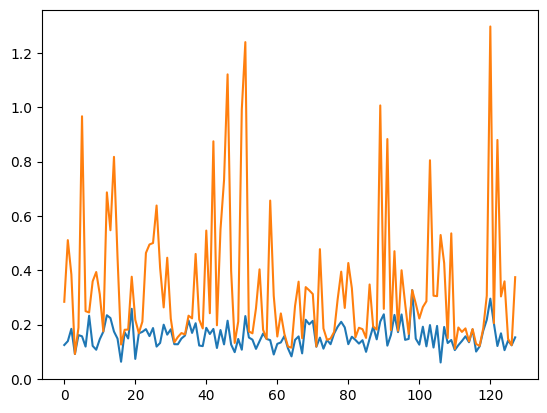

In [21]:
plt.plot(zs_np.std(0));
plt.plot(np.sqrt((zs_np**2).mean(0)));

In [109]:
# deviation for epis with and without perturbation
a = epis[0]["action"].to("cuda")
zin = torch.cat([zs, a], dim=-1)
zpred_fm = trainer.agent.model._dynamics(zin).detach().cpu().numpy()[:,:128] 
zpred_fm.shape

(200, 128)

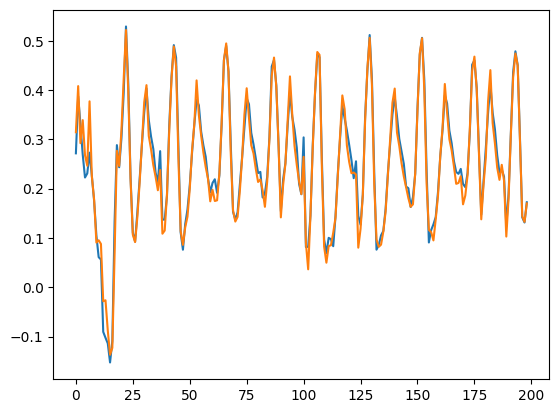

In [110]:
delay=1
plt.plot(zs_np[delay:,0])
plt.plot(zpred_fm[:-delay,0]);

In [117]:
a.shape

torch.Size([200, 6])

In [133]:
zpredv = torch.zeros((180,16,128)).to("cuda")
zpredv[:,0] = zs[:180]
for i in range(1,16):
    zin = torch.cat([zpredv[:,i-1], a[i-1:180+i-1]], dim=-1)
    zpredv[:,i] = trainer.agent.model._dynamics(zin)[:,:128] 

In [135]:
zpredv.shape

torch.Size([180, 16, 128])

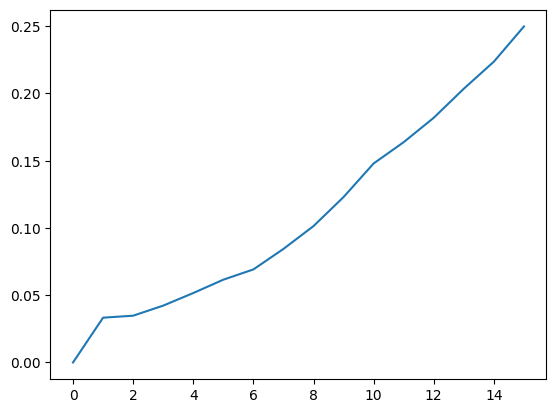

In [146]:
diffs = np.zeros([180,16,128])
for t in range(180):
    diffs[t] = zpredv.detach().cpu().numpy()[t,:] - zs_np[t:t+16]
plt.plot(np.sqrt((diffs**2).mean(2).mean(0)));

In [147]:
zs_np.shape

(200, 128)

In [158]:
np.corrcoef(zs_np.T)

array([[ 1.        ,  0.04791287,  0.2096493 , ...,  0.45327631,
         0.19521448,  0.01764191],
       [ 0.04791287,  1.        , -0.02749778, ..., -0.37233569,
        -0.29175945,  0.31607686],
       [ 0.2096493 , -0.02749778,  1.        , ..., -0.05293605,
        -0.09899206, -0.61844881],
       ...,
       [ 0.45327631, -0.37233569, -0.05293605, ...,  1.        ,
         0.44211901,  0.02571893],
       [ 0.19521448, -0.29175945, -0.09899206, ...,  0.44211901,
         1.        ,  0.40004261],
       [ 0.01764191,  0.31607686, -0.61844881, ...,  0.02571893,
         0.40004261,  1.        ]])

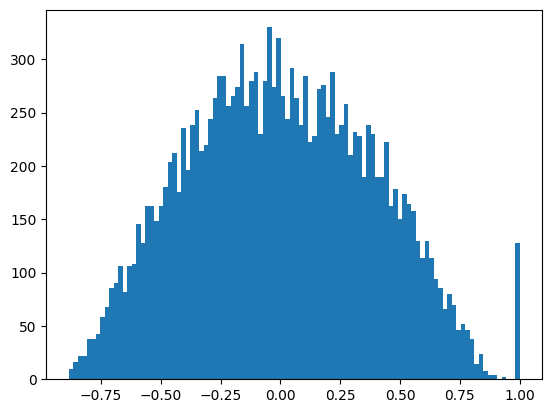

In [164]:
plt.hist(np.corrcoef(zs_np.T).flatten(), bins=100);

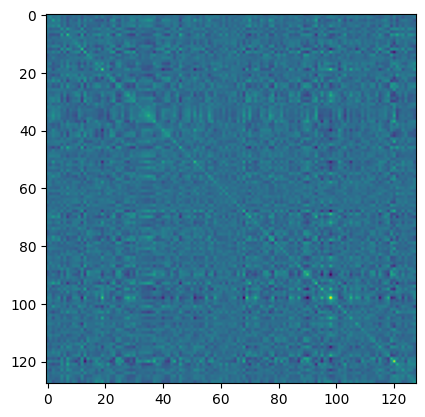

In [154]:
plt.imshow(np.cov(zs_np.T))

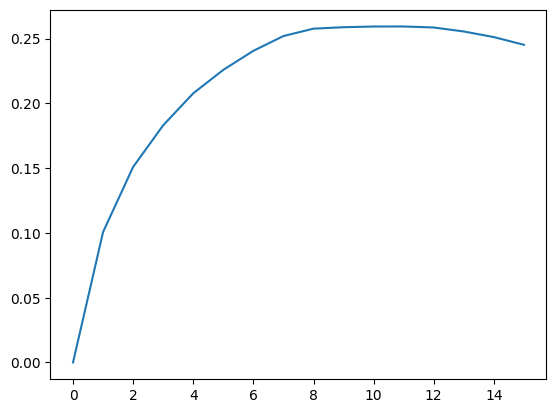

In [152]:
diffs = np.zeros([16])
for d in range(16):
    diffs[d] = ((zs_np[:180] - zs_np[d:180+d])**2).mean()
plt.plot(np.sqrt(diffs));

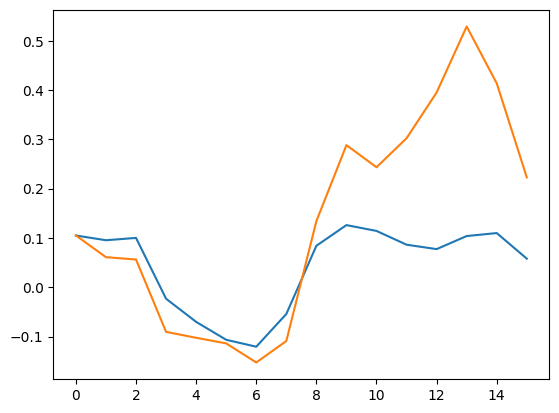

In [136]:
plt.plot(zpredv.detach().cpu().numpy()[10,:,0]);
plt.plot(zs_np[10:10+16,0]);

In [105]:
# deviation for epis with and without perturbation
a = epis[0]["action"].to("cuda")
zin = torch.cat([zs, a], dim=-1)
zpred = trainer.agent.model._ctrl_dynamics(zin).detach().cpu().numpy()[:,:128] + zs_np
zpred.shape

(200, 128)

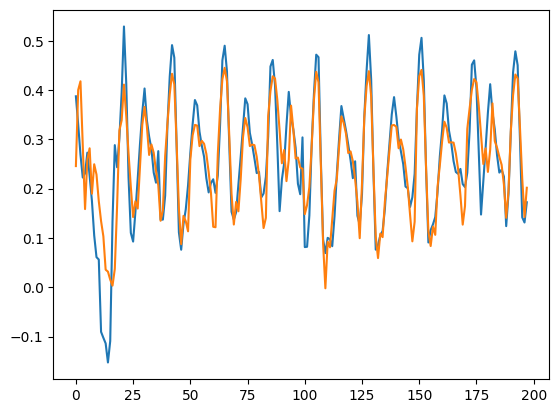

In [106]:
delay=2
plt.plot(zs_np[delay:,0])
plt.plot(zpred[:-delay,0])

In [96]:
np.sqrt(np.mean((zs_np[delay:]-zpred[:-delay])**2, axis=0)).mean()

0.089519024

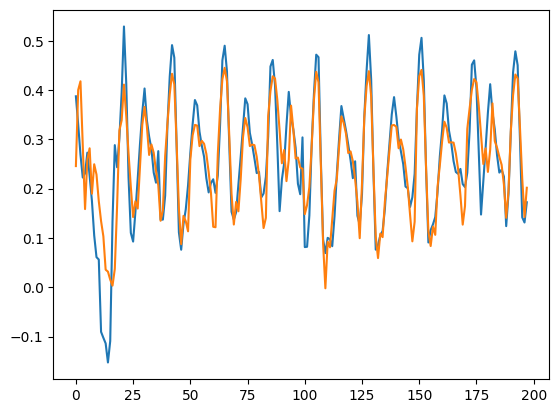

In [107]:
delay=2
plt.plot(zs_np[delay:,0])
plt.plot(zpred[:-delay,0])

In [108]:
np.sqrt(np.mean((zs_np[delay:]-zpred[:-delay])**2, axis=0)).mean()

0.073582694

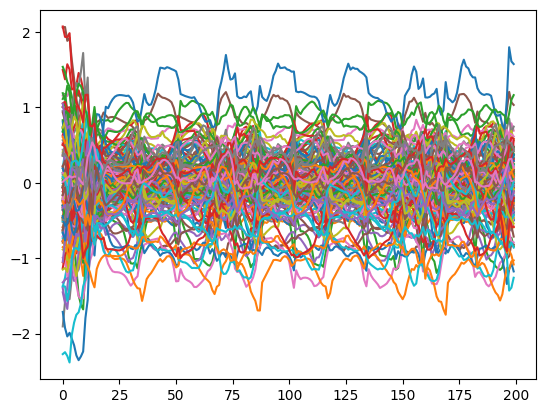

In [42]:
plt.plot(zs);

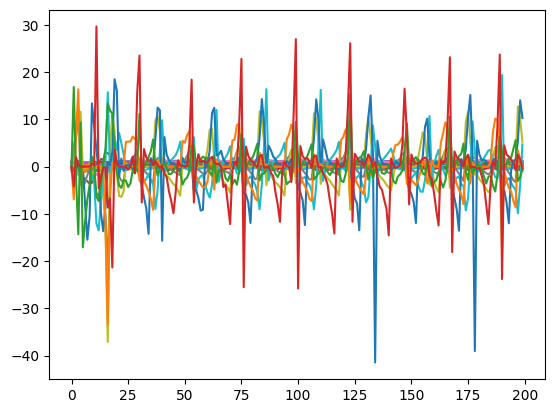

In [15]:
plt.plot(epis[0]["obs"]);

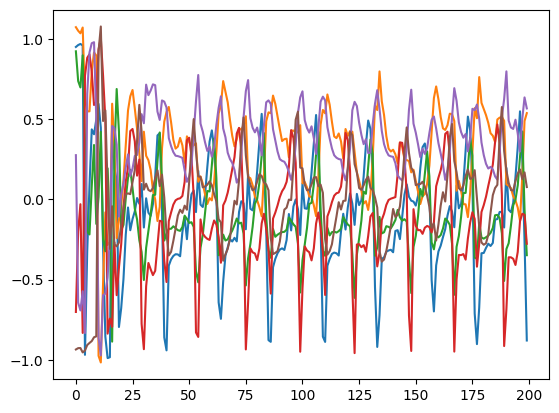

In [210]:
plt.plot(epis[0]["action_total"])

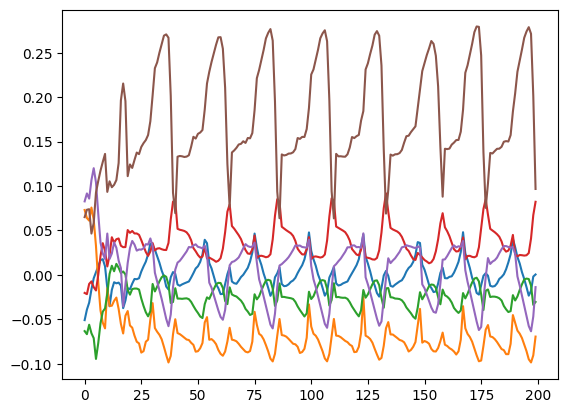

In [211]:
plt.plot(epis[0]["action_ctrl"])

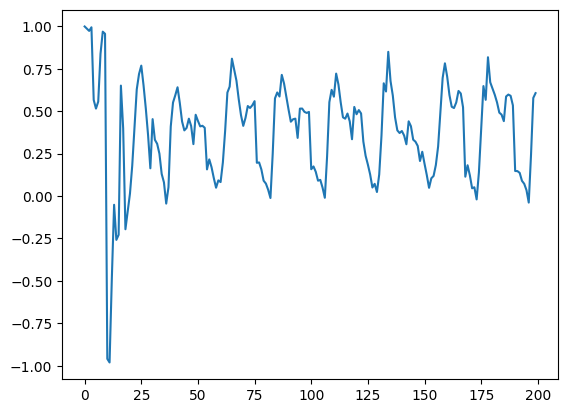

In [212]:
plt.plot(epis[0]["action"][:,1])

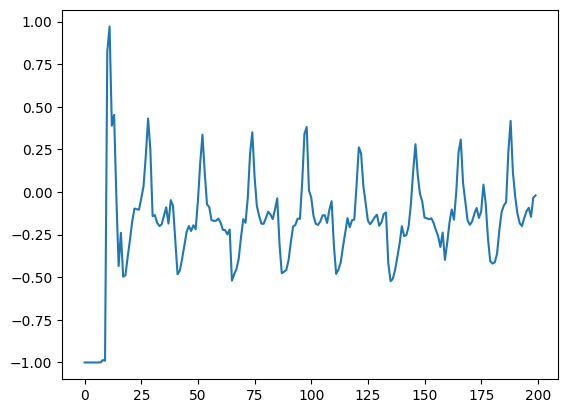

In [213]:
plt.plot(epis[0]["action"][:,5])

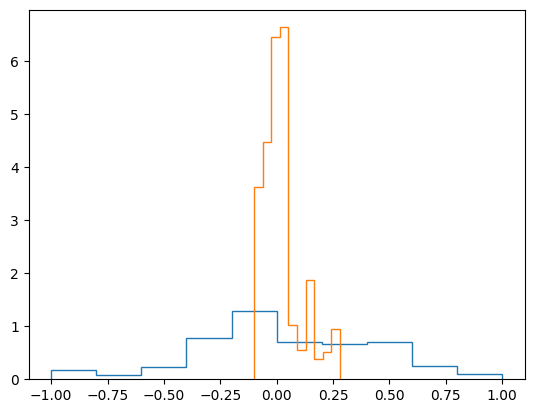

In [214]:
plt.hist(epis[0]["action"].flatten(), density=True, bins=10, histtype='step');
plt.hist(epis[0]["action_ctrl"].flatten(), density=True, bins=10, histtype='step');

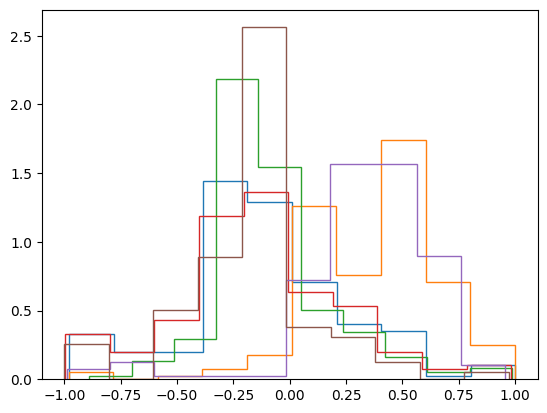

In [215]:
for i in range(epis[0]["action"].shape[1]):
    plt.hist(epis[0]["action"][:,i], density=True, bins=10, histtype='step');

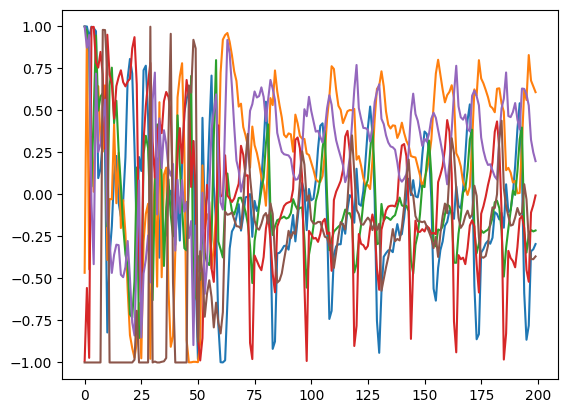

In [216]:
plt.plot(epis[2]["action"])

(-0.3, 0.3)

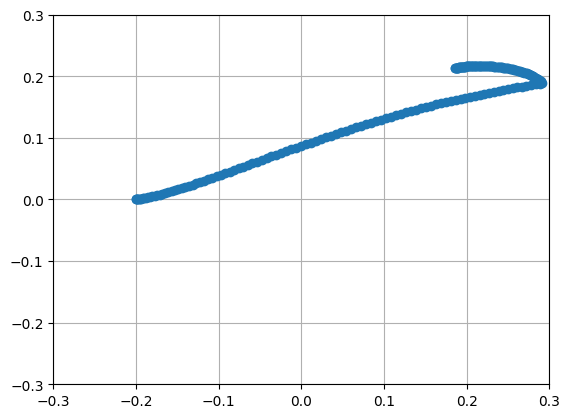

In [46]:
plt.plot(epis[0]["obs"][:, 0], epis[0]["obs"][:, 1], 'o')
plt.grid()
plt.xlim(-0.3, 0.3)
plt.ylim(-0.3, 0.3)

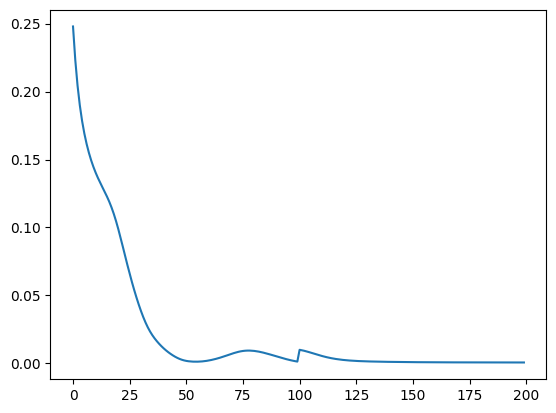

In [47]:
plt.plot(epis[0]["action"].pow(2).sum(1))

In [21]:
run = wandb.init()
artifact = run.use_artifact('cstein06/control/run-er1in7ls-log_episodes.npy:v1', type='unspecified')
artifact_path = artifact.download()

wandb:   1 of 1 files downloaded.  


In [22]:
artifact_path

'g:\\My Drive\\work\\projects\\cerebellum\\code\\tdmpc2\\tdmpc2\\artifacts\\run-er1in7ls-log_episodes.npy-v1'

In [20]:
epfile = "G:\My Drive\\work\\projects\\cerebellum\code\\tdmpc2\\tdmpc2\\outputs\\2024-06-18\\16-29-01\\logs\\pointmass-easy\\1\\default\\log_episodes.npy"

In [21]:
ep = torch.load(epfile)

In [23]:
ep[0].shape

torch.Size([90])

In [26]:
ep[0]["action"]

tensor([[ 0.9962,  0.9930],
        [ 0.9961,  0.9932],
        [ 0.9960,  0.9933],
        [ 0.9959,  0.9934],
        [ 0.9958,  0.9934],
        [ 0.9957,  0.9935],
        [ 0.9957,  0.9935],
        [ 0.9956,  0.9935],
        [ 0.9955,  0.9935],
        [ 0.9955,  0.9934],
        [ 0.9954,  0.9934],
        [ 0.9954,  0.9933],
        [ 0.9954,  0.9933],
        [ 0.9953,  0.9932],
        [ 0.9953,  0.9931],
        [ 0.9953,  0.9930],
        [ 0.9953,  0.9929],
        [ 0.9952,  0.9927],
        [ 0.9952,  0.9926],
        [ 0.9951,  0.9924],
        [ 0.9951,  0.9923],
        [ 0.9950,  0.9921],
        [ 0.9950,  0.9919],
        [ 0.9950,  0.9916],
        [ 0.9949,  0.9914],
        [ 0.9949,  0.9911],
        [ 0.9949,  0.9907],
        [ 0.9950,  0.9904],
        [ 0.9950,  0.9900],
        [ 0.9949,  0.9895],
        [ 0.9949,  0.9889],
        [ 0.9949,  0.9882],
        [ 0.9949,  0.9874],
        [ 0.9948,  0.9865],
        [ 0.9948,  0.9854],
        [ 0.9948,  0

In [26]:
log_episodes = torch.load(artifact_path + "\\log_episodes.npy")

In [32]:
len(log_episodes)

3

In [31]:
log_episodes[0].shape

torch.Size([90])

In [33]:
log_episodes[0]["action"]

tensor([[ 0.9962,  0.9930],
        [ 0.9961,  0.9932],
        [ 0.9960,  0.9933],
        [ 0.9959,  0.9934],
        [ 0.9958,  0.9934],
        [ 0.9957,  0.9935],
        [ 0.9957,  0.9935],
        [ 0.9956,  0.9935],
        [ 0.9955,  0.9935],
        [ 0.9955,  0.9934],
        [ 0.9954,  0.9934],
        [ 0.9954,  0.9933],
        [ 0.9954,  0.9933],
        [ 0.9953,  0.9932],
        [ 0.9953,  0.9931],
        [ 0.9953,  0.9930],
        [ 0.9953,  0.9929],
        [ 0.9952,  0.9927],
        [ 0.9952,  0.9926],
        [ 0.9951,  0.9924],
        [ 0.9951,  0.9923],
        [ 0.9950,  0.9921],
        [ 0.9950,  0.9919],
        [ 0.9950,  0.9916],
        [ 0.9949,  0.9914],
        [ 0.9949,  0.9911],
        [ 0.9949,  0.9907],
        [ 0.9950,  0.9904],
        [ 0.9950,  0.9900],
        [ 0.9949,  0.9895],
        [ 0.9949,  0.9889],
        [ 0.9949,  0.9882],
        [ 0.9949,  0.9874],
        [ 0.9948,  0.9865],
        [ 0.9948,  0.9854],
        [ 0.9948,  0

In [28]:
log_episodes[0][50]

TensorDict(
    fields={
        action: Tensor(shape=torch.Size([2]), device=cpu, dtype=torch.float32, is_shared=False),
        action_ctrl: Tensor(shape=torch.Size([2]), device=cpu, dtype=torch.float32, is_shared=False),
        action_eff: Tensor(shape=torch.Size([2]), device=cpu, dtype=torch.float32, is_shared=False),
        action_total: Tensor(shape=torch.Size([2]), device=cpu, dtype=torch.float32, is_shared=False),
        obs: Tensor(shape=torch.Size([4]), device=cpu, dtype=torch.float32, is_shared=False),
        reward: Tensor(shape=torch.Size([]), device=cpu, dtype=torch.float32, is_shared=False)},
    batch_size=torch.Size([]),
    device=None,
    is_shared=False)

In [30]:
plt.plot(log_episodes[0][:100,0]);
plt.plot(log_episodes[0][:100,2]);
plt.plot(log_episodes[0][:100,4]);
plt.grid();

IndexError: too many indices for tensor of dimension 1

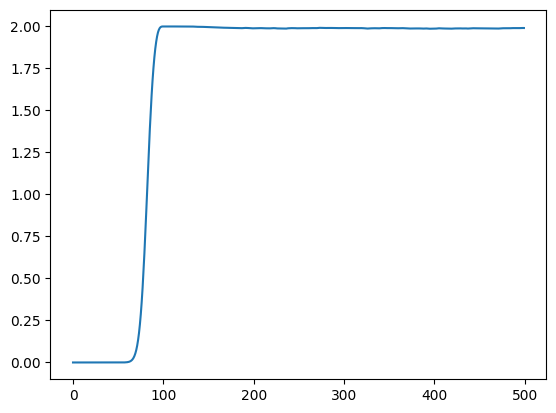

In [53]:
plt.plot(log_episodes[0,:,6]);

In [21]:
agent.model._ctrl_dynamics(torch.zeros(6).to(agent.device))

tensor([ 9.3161e-03,  2.7370e-03,  3.9348e-02,  3.1717e-02, -1.0206e+01,
        -1.0283e+01, -8.5235e+00, -8.5565e+00], device='cuda:0',
       grad_fn=<ViewBackward0>)

In [23]:
agent.model._ctrl_dynamics(torch.tensor([0.e-2, 0.e-2, 0., 0., 0., 0.]).to(agent.device))

tensor([ 9.3161e-03,  2.7370e-03,  3.9348e-02,  3.1717e-02, -1.0206e+01,
        -1.0283e+01, -8.5235e+00, -8.5565e+00], device='cuda:0',
       grad_fn=<ViewBackward0>)

In [54]:
agent.model._ctrl_dynamics(torch.tensor([0., 0., 0.1, 0.1, 0., 0.]).to(agent.device))

tensor([  0.0547,   0.0435,  -0.0742,  -0.0891, -10.0827,  -9.9151,  -8.0687,
         -7.8373], device='cuda:0', grad_fn=<ViewBackward0>)

In [55]:
agent.model._ctrl_dynamics(torch.tensor([0., 0., 0.1, 0.1, 1., 1.]).to(agent.device))

tensor([ 0.0499,  0.0456, -0.0250, -0.0183, -9.3278, -9.2448, -7.8511, -7.6764],
       device='cuda:0', grad_fn=<ViewBackward0>)

In [68]:
agent.model._ctrl_dynamics(torch.tensor([0., 0., 0.05, 0.05, 0.9, 0.9]).to(agent.device))

tensor([ 3.4092e-02,  3.0771e-02, -4.6946e-03,  2.2272e-03, -9.5211e+00,
        -9.5025e+00, -8.0169e+00, -7.9284e+00], device='cuda:0',
       grad_fn=<ViewBackward0>)

In [73]:
agent.control_predict(torch.tensor([0., 0., 0.05, 0.05]).to(agent.device), torch.tensor([1., 1.]).to(agent.device))

(array([0.03411071, 0.03120993, 0.04710774, 0.05492379], dtype=float32),
 array([7.514895e-05, 7.569467e-05, 3.353868e-04, 3.657715e-04],
       dtype=float32))

In [10]:
agent=TDMPC2(cfg)

In [11]:
agent.control_predict(torch.ones(4), torch.zeros(2))

(array([0.99992454, 0.99848807, 0.99981457, 0.9996759 ], dtype=float32),
 array([0.00039971, 0.00040037, 0.00040003, 0.00039937], dtype=float32))

In [12]:
model._ctrl_dynamics[-1].bias

Parameter containing:
tensor([ 0.0000,  0.0000,  0.0000,  0.0000, -7.8240, -7.8240, -7.8240, -7.8240],
       requires_grad=True)

In [13]:
model._ctrl_dynamics[-1].parameters()

<generator object Module.parameters at 0x000001BADE2F5CF0>

In [14]:
model._ctrl_dynamics[-1].weight[:,0]

tensor([ 1.0434e-04,  6.4209e-06,  4.1754e-05, -1.0034e-04, -1.1945e-04,
         3.1155e-05, -3.7919e-06,  7.8259e-05], grad_fn=<SelectBackward0>)

In [34]:
type(cfg.obs_shape['state'])

omegaconf.listconfig.ListConfig

In [35]:
cfg.action_dim

2

check rewards

In [187]:
api = wandb.Api()
run1 = api.run("cstein06/control/nb2j8zfq")
run2 = api.run("cstein06/control/msvetsal")
run3 = api.run("cstein06/control/0pvlvgq5")
run4 = api.run("cstein06/control/zd3pngjx")

In [188]:
h1 = run1.history()
h2 = run2.history()
h3 = run3.history()
h4 = run4.history()

In [184]:
h1['_step']

0           0
1         200
2         600
3        1200
4        1600
        ...  
495    159200
496    159400
497    159600
498    159800
499    160000
Name: _step, Length: 500, dtype: int64

In [178]:
h1.columns

Index(['videos/eval_video_1', 'eval/step', 'eval/deviation', 'train/ctrl_loss',
       '_runtime', 'train/step', 'train/perturb_factor_1', 'eval/total_time',
       'train/episode_reward', 'eval/episode_reward', 'eval/episode',
       'eval/episode_length', 'train/perturb_factor_0',
       'train/episode_success', 'train/total_time', 'videos/eval_video_2',
       'eval/deviation_signed', 'train/episode_length', 'eval/episode_success',
       '_step', 'train/ctrl_dist', 'train/episode_reward_ctrl',
       'train/episode', '_timestamp', 'train/episose_reward_total',
       'train/ctrl_sig', 'videos/eval_video_3'],
      dtype='object')

In [221]:
# mean_reward = h[(h['_step'] >= 20000) & (h['_step'] <= 40000)]['train/episode_reward'].mean()
bin = 5000
mean_reward1 = h1.groupby(h1['_step'] // bin * bin)['train/episode_reward'].mean()
mean_reward2 = h2.groupby(h2['_step'] // bin * bin)['train/episode_reward'].mean()
mean_reward3 = h3.groupby(h3['_step'] // bin * bin)['train/episode_reward'].mean()
mean_reward4 = h4.groupby(h4['_step'] // bin * bin)['train/episode_reward'].mean()
# mean_reward1, mean_reward2


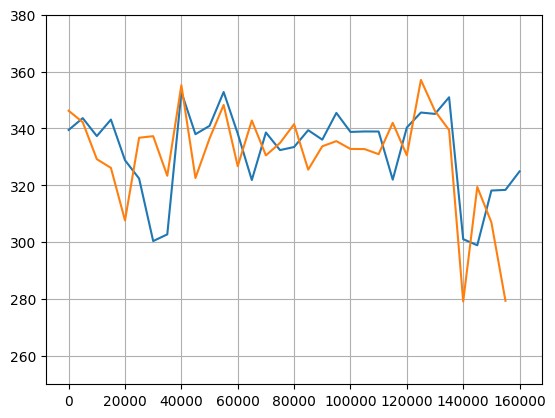

In [222]:
plt.plot(mean_reward1)
# plt.plot(mean_reward2);
# plt.plot(mean_reward3);
plt.plot(mean_reward4);
plt.ylim(250,380);
plt.grid()

In [ ]:
# get rewards from wandb 'train/episode_reward'
run = wandb.init()
artifact = run.use_artifact('cstein06/control/run-er1in7ls-log_episodes.npy:v1', type='unspecified')

trainer

In [6]:
trainer_cls = OnlineTrainer
trainer = trainer_cls(		cfg=cfg,
		env=make_env(cfg),
		agent=TDMPC2(cfg),
		buffer=Buffer(cfg),
		logger=Logger(cfg),
	)

c:\Users\MSI\anaconda3\envs\tdmpc2\lib\site-packages\torch\_functorch\deprecated.py:108: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.combine_state_for_ensemble is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.stack_module_state instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('combine_state_for_ensemble', 'torch.func.stack_module_state')
ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


---------------------------------------
  Task:           Pointmass Mine
  Steps:          50,000
  Observations:   4
  Actions:        2
  Experiment:     default
---------------------------------------


wandb: Currently logged in as: cstein06. Use `wandb login --relogin` to force relogin


Logs will be synced with wandb.
Learnable parameters: 2,733,680
Architecture: WorldModel(
  (_encoder): ModuleDict(
    (state): Identity()
  )
  (_ctrl_dynamics): Sequential(
    (0): NormedLinear(in_features=6, out_features=512, bias=True, act=Mish)
    (1): NormedLinear(in_features=512, out_features=512, bias=True, act=Mish)
    (2): Linear(in_features=512, out_features=8, bias=True)
  )
  (_dynamics): Sequential(
    (0): NormedLinear(in_features=6, out_features=512, bias=True, act=Mish)
    (1): NormedLinear(in_features=512, out_features=512, bias=True, act=Mish)
    (2): Linear(in_features=512, out_features=4, bias=True)
  )
  (_reward): Sequential(
    (0): NormedLinear(in_features=6, out_features=512, bias=True, act=Mish)
    (1): NormedLinear(in_features=512, out_features=512, bias=True, act=Mish)
    (2): Linear(in_features=512, out_features=101, bias=True)
  )
  (_pi): Sequential(
    (0): NormedLinear(in_features=4, out_features=512, bias=True, act=Mish)
    (1): NormedLine

In [9]:
if cfg.checkpoint_wandb:
    print("Loading wandb artifact:", cfg.checkpoint_wandb)
    artifact = trainer.logger._wandb.run.use_artifact(cfg.checkpoint_wandb, type='model')
    artifact_dir = artifact.download()
    artifact_path = artifact_dir + f'/{cfg.checkpoint_filename}'
    print("Artifact path:", artifact_path)
    trainer.agent.load(artifact_path)

In [10]:
trainer.set_env()

In [11]:
trainer.env.unwrapped.physics.model

In [12]:
trainer.logger._wandb.run.name

'wandering-glade-371'

check env

In [63]:
trainer.env

<TensorWrapper<envs.dmcontrol.TimeStepToGymWrapper object at 0x000001CECBB838E0>>

In [ ]:
mjv_updateScene

In [66]:
import dm_control.mujoco.wrapper as mjw

In [73]:
scene = mjw.MjvScene()

In [75]:
scene.ngeom

0

In [78]:
mujoco.mjv_updateScene

TypeError: mjv_updateScene(): incompatible function arguments. The following argument types are supported:
    1. (m: mujoco._structs.MjModel, d: mujoco._structs.MjData, opt: mujoco._structs.MjvOption, pert: Optional[mujoco._structs.MjvPerturb], cam: mujoco._structs.MjvCamera, catmask: int, scn: mujoco._structs.MjvScene) -> None

Invoked with: 

In [68]:
mjw.MjvScene.mjv_updateScene()

AttributeError: type object 'MjvScene' has no attribute 'mjv_updateScene'

In [7]:
trainer.env.unwrapped.physics.named.model.geom_friction

NameError: name 'trainer' is not defined

In [15]:
trainer.env.unwrapped.physics.named.model.geom_friction[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
trainer.env.unwrapped.physics.named.data.geom_xpos['target']

array([0.  , 0.  , 0.01])

In [17]:
trainer.env.unwrapped.physics.named.model.geom_size['target']

array([0.02, 0.  , 0.  ])

In [18]:
trainer.env.unwrapped.physics.named.model.geom_pos['target']

array([0.2 , 0.2 , 0.01])

In [19]:
trainer.env.unwrapped.physics.named.model.geom_margin['target']

0.1

In [20]:
physics = trainer.env.unwrapped.physics

In [21]:
trainer.env.unwrapped.task._control_cost

1.0

In [22]:
# trainer.env.unwrapped.task._control_cost = 1.

In [23]:
# trainer.env.unwrapped.physics.named.model.geom_margin['target'] = 0.

In [24]:
from dm_control.utils import rewards

In [25]:
rewards.tolerance(np.linspace(-2,2,21), margin=1,
                                       value_at_margin=0,
                                       sigmoid='quadratic')

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.36, 0.64, 0.84, 0.96, 1.  ,
       0.96, 0.84, 0.64, 0.36, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [59]:
trainer.env.unwrapped.physics.named.model.geom_friction[:] = 0.

In [9]:
# check friction
trainer.set_env()
print(trainer.env.unwrapped.physics.named.model.geom_friction)

obs = trainer.env.reset()
print(obs)

obs, _, _, _ = trainer.env.step(torch.tensor([1.,0]))

print(obs)

obs, _, _, _ = trainer.env.step(torch.tensor([0,0]))

print(obs)

obs, _, _, _ = trainer.env.step(torch.tensor([0,0]))

print(obs)

obs, _, _, _ = trainer.env.step(torch.tensor([0,0]))

print(obs)

obs, _, _, _ = trainer.env.step(torch.tensor([0,0]))

print(obs)

print(trainer.env.unwrapped.physics.named.model.geom_friction)


FieldIndexer(geom_friction):
 0       ground [ 0         0.005     0.0001  ]
 1       wall_x [ 0         0.005     0.0001  ]
 2       wall_y [ 0         0.005     0.0001  ]
 3   wall_neg_x [ 0         0.005     0.0001  ]
 4   wall_neg_y [ 0         0.005     0.0001  ]
 5       target [ 0         0.005     0.0001  ]
 6         pred [ 0         0.005     0.0001  ]
 7 pred_correct [ 0         0.005     0.0001  ]
 8      optimal [ 0         0.005     0.0001  ]
 9  action_orig [ 0         0.005     0.0001  ]
10 action_total [ 0         0.005     0.0001  ]
11   action_eff [ 0         0.005     0.0001  ]
12  action_ctrl [ 0         0.005     0.0001  ]
13    pointmass [ 0         0.005     0.0001  ]
tensor([-0.0481,  0.1278,  0.0000,  0.0000])
tensor([-0.0477,  0.1278,  0.0133,  0.0000])
tensor([-0.0472,  0.1278,  0.0133,  0.0000])
tensor([-0.0467,  0.1278,  0.0133,  0.0000])
tensor([-0.0461,  0.1278,  0.0133,  0.0000])
tensor([-0.0456,  0.1278,  0.0133,  0.0000])
FieldIndexer(geom_friction):


In [38]:
obs = trainer.env.reset()

In [30]:
done = False
step = 0
while not done:
    print(step)
    action = trainer.agent.act(obs)
    obs, reward, done, info = trainer.env.step(action.detach().cpu())
    print(action, obs, reward, done, info)
    print(action.pow(2).sum())
    step += 1

0
tensor([ 0.3337, -0.6949], grad_fn=<ToCopyBackward0>) tensor([-0.2048, -0.2367,  0.0040, -0.0084]) tensor(-0.2751) False defaultdict(<class 'float'>, {'success': 0.0})
tensor(0.5942, grad_fn=<SumBackward0>)
1
tensor([0.3313, 0.4308], grad_fn=<ToCopyBackward0>) tensor([-0.2045, -0.2368,  0.0076, -0.0022]) tensor(-0.0412) False defaultdict(<class 'float'>, {'success': 0.0})
tensor(0.2953, grad_fn=<SumBackward0>)
2
tensor([0.3219, 0.3076], grad_fn=<ToCopyBackward0>) tensor([-0.2041, -0.2368,  0.0105,  0.0018]) tensor(-0.0041) False defaultdict(<class 'float'>, {'success': 0.0})
tensor(0.1982, grad_fn=<SumBackward0>)
3
tensor([ 0.2427, -0.4352], grad_fn=<ToCopyBackward0>) tensor([-0.2036, -0.2369,  0.0122, -0.0037]) tensor(-0.0193) False defaultdict(<class 'float'>, {'success': 0.0})
tensor(0.2483, grad_fn=<SumBackward0>)
4
tensor([0.2363, 0.2107], grad_fn=<ToCopyBackward0>) tensor([-0.2031, -0.2370,  0.0136, -0.0007]) tensor(1.9359e-33) False defaultdict(<class 'float'>, {'success': 0.0

action cost

In [37]:
obs = trainer.env.reset()
phys = trainer.env.unwrapped.physics

In [38]:
done = False
step = 0
actions_x = np.random.uniform(-1, 1, 500)
actions_y = np.random.uniform(-1, 1, 500)
rews = []
while not done:
    print(step)
    phys.set_state(np.array([-0.1,-0.1,0.,0.]))
    action = torch.tensor([actions_x[step], actions_y[step]])
    obs, reward, done, info = trainer.env.step(action.detach().cpu())
    rews.append(reward)
    print(action, obs, reward, done, info)
    print(action.pow(2).sum())
    step += 1
rews = np.array(rews)

0
tensor([-0.7622,  0.1659], dtype=torch.float64) tensor([-0.1003, -0.0999, -0.0092,  0.0020]) tensor(-0.2889) False defaultdict(<class 'float'>, {'success': 0.0})
tensor(0.6085, dtype=torch.float64)
1
tensor([ 0.7604, -0.9374], dtype=torch.float64) tensor([-0.0997, -0.1003,  0.0097, -0.0115]) tensor(-1.3027) False defaultdict(<class 'float'>, {'success': 0.0})
tensor(1.4570, dtype=torch.float64)
2
tensor([0.2081, 0.0587], dtype=torch.float64) tensor([-0.0999, -0.1000,  0.0019,  0.0014]) tensor(9.1627e-17) False defaultdict(<class 'float'>, {'success': 0.0})
tensor(0.0467, dtype=torch.float64)
3
tensor([ 0.3384, -0.2618], dtype=torch.float64) tensor([-0.0999, -0.1001,  0.0040, -0.0033]) tensor(-0.0016) False defaultdict(<class 'float'>, {'success': 0.0})
tensor(0.1831, dtype=torch.float64)
4
tensor([-0.4101,  0.4107], dtype=torch.float64) tensor([-0.1002, -0.0998, -0.0052,  0.0052]) tensor(-0.0651) False defaultdict(<class 'float'>, {'success': 0.0})
tensor(0.3369, dtype=torch.float64)

In [40]:
norms = np.linalg.norm(np.array([actions_x, actions_y]), axis=0)

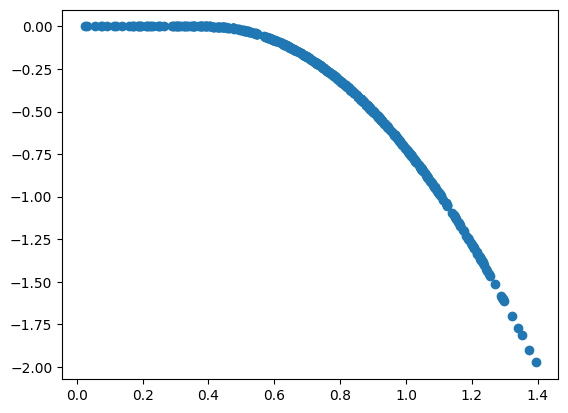

In [42]:
plt.plot(norms, rews, 'o');

env render plots

In [28]:
trainer.set_env()
trainer.env.reset()
trainer.set_init_state()
physics = trainer.env.unwrapped.physics

In [265]:
# action = trainer.agent.act(obs)
action = torch.ones(2)

obs, rew, done, info = trainer.env.step(action.detach().cpu())

In [266]:
action

tensor([1., 1.])

In [267]:
# trainer.show_prediction(obs, action.detach().cpu())

In [268]:
scene_option.flags = np.zeros(scene_option.flags.shape)
scene_option.flags

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [269]:
from dm_control.mujoco.wrapper.mjbindings import enums
scene_option = mujoco.wrapper.core.MjvOption()
mujoco.wrapper.core.mjlib.mjv_defaultOption(scene_option.ptr)

scene_option.frame = enums.mjtFrame.mjFRAME_GEOM
scene_option.flags[enums.mjtVisFlag.mjVIS_CONTACTPOINT] = True
scene_option.flags[enums.mjtVisFlag.mjVIS_ACTIVATION] = True
scene_option.flags[enums.mjtVisFlag.mjVIS_ACTUATOR] = True
scene_option.flags[enums.mjtVisFlag.mjVIS_CONTACTFORCE] = True
scene_option.flags[enums.mjtVisFlag.mjVIS_PERTFORCE] = True
scene_option.flags[enums.mjtVisFlag.mjVIS_TRANSPARENT] = True

In [273]:
# tweak scales of contact visualization elements
physics.model.vis.scale.contactwidth = 1.
physics.model.vis.scale.contactheight = 0.3
physics.model.vis.scale.forcewidth = 10.
physics.model.vis.map.force = 2.

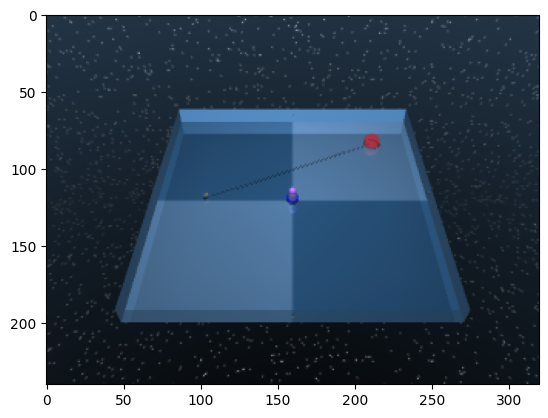

In [274]:
pixels = physics.render(scene_option=scene_option)
plt.imshow(pixels);

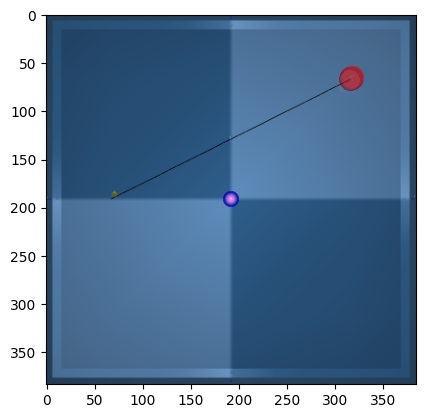

In [275]:
pixels = trainer.env.render(scene_option=scene_option)
plt.imshow(pixels);

In [238]:
import mujoco.viewer as viewer

In [243]:
unenv = trainer.env.unwrapped

In [244]:
unenv.render()

AttributeError: 'Environment' object has no attribute 'render'

In [ ]:
mujoco.mjv_initGeom(
                        # scn.geoms[scn.ngeom-1],
                      mujoco.mjtGeom.mjGEOM_CAPSULE, np.zeros(3),
                      np.zeros(3), np.zeros(9), rgba.astype(np.float32))

In [112]:
def scene_callback(physics, scn):
    rgba = np.array([1., 0., 0., 1.], dtype=np.float32)
    radius = 0.01
    point1 = physics.named.data.geom_xpos['target']
    point2 = physics.named.data.geom_xpos['target'] + np.array([0., 0.2, 0.])
    mujoco.mjv_initGeom(
                        
                        # scn.geoms[scn.ngeom-1],
                      mujoco.mjtGeom.mjGEOM_CAPSULE, np.zeros(3),
                      np.zeros(3), np.zeros(9), rgba.astype(np.float32))
    # mujoco.mjv_makeConnector(scn.geoms[scn.ngeom-1],
    #                        mujoco.mjtGeom.mjGEOM_CAPSULE, radius,
    #                        point1[0], point1[1], point1[2],
                        #    point2[0], point2[1], point2[2])
    # mujoco.mjv_makeConnector(scn.geoms[scn.ngeom-1],
    #                        mujoco.mjtGeom.mjGEOM_CAPSULE, radius,
    #                        point1[0], point1[1], point1[2],
                        #    point2[0], point2[1], point2[2])

In [115]:
physics = trainer.env.unwrapped.physics
# camera = mujoco.Camera(physics, max_geom=10000,
                        #    scene_callback=scene_callback)
pixels = trainer.env.render()
# frames.append(pixels)
plt.imshow(pixels)

AttributeError: 'Environment' object has no attribute 'render'

policies

In [27]:
trainer.agent.model._pi

NameError: name 'atrainer' is not defined

In [ ]:
obs = trainer.env.reset()
obs

tensor([ 0.5940, -1.1288, -0.0964,  0.0652, -0.1632, -0.3500, -1.9004,  0.3255,
         0.5840, -0.4268,  0.1966,  0.3218, -0.6771, -0.3832,  0.5049, -1.2223,
        -0.3500,  0.6493, -0.3041, -0.3189, -1.2531,  1.6860,  0.5500,  0.1842,
        -0.1535,  0.2468,  0.6187, -0.9353,  0.1381, -0.2036,  0.1685,  0.3809,
         0.2017, -0.6862, -0.0489,  0.1974,  0.9791,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000])

In [ ]:
obs = obs.to(trainer.agent.device, non_blocking=True).unsqueeze(0)

In [25]:
z = trainer.agent.model.encode(obs, None)
z

tensor([[0.0131, 0.0876, 0.0802, 0.4303, 0.0170, 0.2621, 0.0548, 0.0549, 0.1728,
         0.1797, 0.0420, 0.0744, 0.3237, 0.1118, 0.0626, 0.0329, 0.0765, 0.1079,
         0.2486, 0.1026, 0.0810, 0.1201, 0.2253, 0.0379, 0.0451, 0.0846, 0.1261,
         0.0441, 0.0873, 0.3245, 0.0437, 0.2447, 0.0687, 0.0228, 0.3301, 0.0626,
         0.0562, 0.0385, 0.0424, 0.3788, 0.1543, 0.2361, 0.0371, 0.0501, 0.0940,
         0.0902, 0.2346, 0.1035, 0.1866, 0.1158, 0.1232, 0.1179, 0.1760, 0.0538,
         0.1991, 0.0276, 0.2480, 0.0337, 0.2922, 0.0191, 0.0138, 0.0593, 0.1492,
         0.1846, 0.1166, 0.2035, 0.1262, 0.0518, 0.2690, 0.1164, 0.0829, 0.0336,
         0.0642, 0.2931, 0.0304, 0.0552, 0.1091, 0.1608, 0.0997, 0.1875, 0.1811,
         0.1285, 0.0664, 0.0636, 0.0306, 0.0084, 0.3863, 0.1350, 0.0869, 0.0996,
         0.0741, 0.0672, 0.1027, 0.3791, 0.0579, 0.1326, 0.0190, 0.0267, 0.0101,
         0.0310, 0.1484, 0.0574, 0.0583, 0.6491, 0.0747, 0.0593, 0.1393, 0.0805,
         0.5548, 0.0279, 0.0

In [28]:
a = trainer.agent.model.pi(z, None)[1][0]
a

tensor([-0.5172, -0.1855, -0.0112, -0.2529, -0.0453, -0.0611, -0.3110, -0.1090,
        -0.0283, -0.0230, -0.2707, -0.2208, -0.4569,  0.1826, -0.0633, -0.0802,
         0.0522,  0.1652, -0.0700,  0.0548, -0.4273], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [17]:
trainer.agent.act(obs)

action grad fn 2: None
tensor([[-0.5151, -0.2183, -0.0824, -0.2368, -0.0453, -0.0611, -0.4465, -0.1835,
         -0.0545, -0.0284, -0.2830, -0.2220, -0.4362,  0.1659, -0.0623, -0.0791,
         -0.4023,  0.1843, -0.0723,  0.0517, -0.4493]], device='cuda:0')
atest grad fn: None


tensor([-0.5221, -0.1703,  0.1166, -0.2585, -0.0484, -0.0588, -0.2673, -0.0681,
        -0.0671, -0.0290, -0.2644, -0.2222, -0.4303,  0.1916, -0.0626, -0.0788,
         0.3068,  0.1698, -0.0659,  0.0537, -0.4359])

In [ ]:
trainer.train()

In [15]:
import torch 
torch.cuda.is_available()

True

In [39]:
# load dm_control env
import dm_control

from dm_control import suite
import numpy as np

from dm_control import mujoco



In [40]:
physics = mujoco.Physics.from_xml_string(static_model)


NameError: name 'static_model' is not defined

In [84]:
import dm_control

In [85]:
dm_control.__file__

'c:\\Users\\MSI\\anaconda3\\envs\\tdmpc2\\lib\\site-packages\\dm_control\\__init__.py'

In [83]:
from dm_control.utils import rewards

In [37]:
vars(rewards)

{'__name__': 'dm_control.utils.rewards',
 '__doc__': 'Soft indicator function evaluating whether a number is within bounds.',
 '__package__': 'dm_control.utils',
 '__loader__': <_frozen_importlib_external.SourceFileLoader at 0x1faabb09790>,
 '__spec__': ModuleSpec(name='dm_control.utils.rewards', loader=<_frozen_importlib_external.SourceFileLoader object at 0x000001FAABB09790>, origin='c:\\Users\\MSI\\anaconda3\\envs\\tdmpc2\\lib\\site-packages\\dm_control\\utils\\rewards.py'),
 '__file__': 'c:\\Users\\MSI\\anaconda3\\envs\\tdmpc2\\lib\\site-packages\\dm_control\\utils\\rewards.py',
 '__cached__': 'c:\\Users\\MSI\\anaconda3\\envs\\tdmpc2\\lib\\site-packages\\dm_control\\utils\\__pycache__\\rewards.cpython-39.pyc',
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.",
  '__package__': '',
  '__loader__': _frozen_importlib.BuiltinImporter,
  '__spec__': Mod

In [24]:
env = suite.load(domain_name="humanoid", task_name="stand")

In [25]:
a = env.reset()

In [46]:
dir(env.physics)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_contexts',
 '_contexts_lock',
 '_data',
 '_free_rendering_contexts',
 '_make_rendering_contexts',
 '_named',
 '_new_warnings',
 '_physics_state_items',
 '_reload_from_data',
 '_reload_from_model',
 '_step_with_up_to_date_position_velocity',
 '_warnings',
 '_warnings_before',
 '_warnings_cause_exception',
 'activation',
 'after_reset',
 'center_of_mass_position',
 'center_of_mass_velocity',
 'check_divergence',
 'check_invalid_state',
 'contexts',
 'control',
 'copy',
 'data',
 'enable_profiling',
 'extremities',
 'forward',
 'fre

In [49]:
env.physics.torso_upright()

0.2591486275956094

In [33]:
a = env.step(action)

In [34]:
a

TimeStep(step_type=<StepType.MID: 1>, reward=0.6251759549391062, discount=1.0, observation=OrderedDict([('joint_angles', array([-0.08013083, -1.24846062,  0.15628188, -0.10930045, -0.33979471,
        0.3795355 , -2.11091445, -0.69644445,  0.80489154, -0.4283976 ,
       -0.13369845, -1.41352164, -1.88303171,  0.81576464, -0.08134116,
       -1.03257747, -0.63396274,  0.29931963,  1.16693293,  1.12373313,
       -1.62034902])), ('head_height', 1.5395249813926186), ('extremities', array([-0.33984119,  0.6810589 , -0.00319464,  0.59674369,  0.2871065 ,
       -0.22459295,  0.17763026, -0.34349913,  0.18954656,  0.21251072,
        0.07896279, -0.65928201])), ('torso_vertical', array([0.78376148, 0.56441114, 0.25914863])), ('com_velocity', array([ 0.01228269, -0.00626209, -0.25252969])), ('velocity', array([  0.06888843,  -0.25731313,  -0.60961412,  -0.1627916 ,
        -1.59057734,  -2.4377255 ,  -1.17130589,   1.78133509,
         6.5213768 ,  -4.4311912 ,   0.42199801,  -0.13892007,
  

In [32]:
spec = env.action_spec()
action = np.random.uniform(spec.minimum, spec.maximum, spec.shape)

In [17]:
"a" / "b"

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [ ]:
""

forward model check

In [33]:
filename = "cstein06/control/run-j3q52nsk-log_episodes.npy:v1"

In [34]:
artifact = trainer.logger._wandb.run.use_artifact(filename, type='unspecified')
artifact_path = artifact.download()

wandb:   1 of 1 files downloaded.  


In [35]:
epis = torch.load(artifact_path + "\\log_episodes.npy")

In [55]:
t = 30
delay = 2

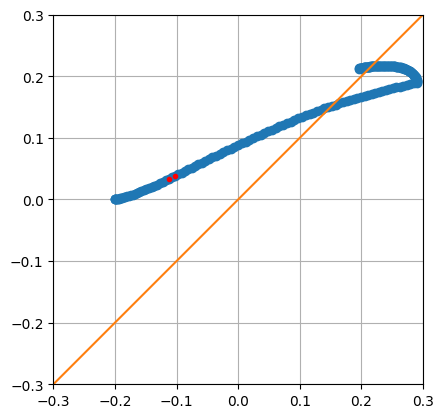

In [56]:
plt.plot(epis[0]["obs"][:, 0], epis[0]["obs"][:, 1], 'o');
plt.grid()
plt.xlim(-0.3, 0.3)
plt.ylim(-0.3, 0.3)
plt.plot([-0.3, 0.3], [-0.3, 0.3]);
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(epis[0]["obs"][t, 0], epis[0]["obs"][t, 1], '.', color='red');
plt.plot(epis[0]["obs"][t+delay, 0], epis[0]["obs"][t+delay, 1], '.', color='red');

In [57]:
epis[0]["obs"][t], epis[0]["obs"][t+delay], epis[0]["obs"][t+2*delay], epis[0]["action"][t]

(tensor([-0.1124,  0.0333,  0.1241,  0.0599]),
 tensor([-0.1023,  0.0383,  0.1283,  0.0631]),
 tensor([-0.0918,  0.0435,  0.1324,  0.0658]),
 tensor([0.1552, 0.1166]))

In [58]:
# forward model
trainer.agent.model.next(epis[0]["obs"][t].to("cuda"), epis[0]["action"][t].to("cuda"), False), epis[0]["obs"][t+1]

(tensor([-0.1068,  0.0355,  0.1258,  0.0613], device='cuda:0',
        grad_fn=<ViewBackward0>),
 tensor([-0.1074,  0.0358,  0.1261,  0.0616]))

In [59]:
# control forward model
trainer.agent.control_predict(epis[0]["obs"][t].to("cuda"), epis[0]["action"][t].to("cuda"))[0], epis[0]["obs"][t+delay]

(array([-0.10255914,  0.04075034,  0.12687343,  0.06270462], dtype=float32),
 tensor([-0.1023,  0.0383,  0.1283,  0.0631]))

In [60]:
trainer.agent.model.ctrl_pred(epis[0]["obs"][t].to("cuda"), epis[0]["action"][t].to("cuda"), False)[:4].cpu().detach()

tensor([0.0098, 0.0074, 0.0027, 0.0028])

In [61]:
# zero action
trainer.agent.model.ctrl_pred(epis[0]["obs"][t].to("cuda"), torch.zeros(2).to("cuda"), False)[:4].cpu().detach()

tensor([ 0.0101,  0.0080, -0.0002,  0.0008])

In [62]:
epis[0]["obs"][t+delay][:4] - epis[0]["obs"][t][:4]

tensor([0.0101, 0.0050, 0.0042, 0.0032])

In [26]:
trainer.agent.model.ctrl_pred(epis[0]["obs"][t].to("cuda"), epis[0]["action"][t].to("cuda"), False)[:4] + epis[0]["obs"][t].to("cuda")[:4]

tensor([-0.1143,  0.0728,  0.1058,  0.0813], device='cuda:0',
       grad_fn=<AddBackward0>)